In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import time
import math
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [2]:
iris = pd.read_csv("C:\\Users\\Thanis\\Desktop\\Data Science\\Machine Learing\\iris.csv")  

In [3]:
X = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y = iris['Species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 50)

# 1-NN algorithm
# method 1 - using for loop(to calculate all distances)

While finding the eucledian distance for the 1-nearest neighbour,the distancs of the particular test data point and all the training data points are calculated and stored in a list.Then minimum of those is chosen as the nearest nighbour.

In [5]:
# 1 - NN in a single cell
dists = []
nei = []
y_pred = []
t1 = time.time()
for i in range(len(X_test)):
    for j in range(len(X_train)):
        distances = np.sqrt(np.sum((X_test.iloc[i,] - X_train.iloc[j,])**2))
        dists.append((distances,j))
    dists.sort()
    #print(dists[0])
    nei.append((dists[0]))
    dists.clear()

for i in range(len(nei)):
    neighbour = nei[i][1]
    y_pred.append(np.array(y_train)[neighbour])
t2 = time.time()
print('time elapsed = ', t2-t1)
print(y_pred)

time elapsed =  20.046192407608032
['setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica']


# method 2 - using for loop(to find the index of the lowest distance)
While finding the eucledian distance of the nearest neighbour,the distance of the particular test data point and the training data points are calculated, the corresponding lowest index is updated in a list.Then record corresponding to the paticular index in the training dataset is the nearest neighbour.

In [6]:
def dist(X_train,test):
    distance = np.sqrt(np.sum((test - X_train)**2))
    #distance = np.sqrt(np.sum((np.matrix(test) - np.matrix(X_train))**2))
    return(distance)

def Onn(X_train, y_train, test):
    min_dist = math.inf
    for i in range(len(X_train)):
        distance = dist(test,X_train.iloc[i,])
    
        if distance < min_dist:
            min_dist = distance
            index = i
    Y = y_train.iloc[index,]
    return(Y)

def knn(X_train, y_train, X_test):
    lst = []
    for i in range(len(X_test)):
        nn = Onn(X_train, y_train, X_test.iloc[i,])
        lst.append((nn))
    return(lst)

t1 = time.time()
y_pred1 = knn(X_train, y_train, X_test)
t2 = time.time()
print('time elapsed:',t2-t1)
print(y_pred1)

time elapsed: 14.409120082855225
['setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica']


# method 3 - using vectorized notation
This method uses vectorized form to calculate the eucledian distance of the test data points and the coressponding training data points(distance between each test data points and all the training data points are calculated) which is way faster than the above two methods.Finally, the minimum distance for the corressponding test data point is chosen as the nearest nighbour.

In [7]:
t1 = time.time()
m = X_train.shape[0] # x has shape (m, d)
n = X_test.shape[0] # y has shape (n, d)
x2 = np.matrix(np.sum(X_train**2, axis=1)).reshape((m, 1))
y2 = np.matrix(np.sum(X_test**2, axis=1)).reshape((1, n))
xy = X_train.dot(X_test.T) # shape is (m, n)
dists = np.sqrt(x2 + y2 - 2*xy) # shape is (m, n)

minlist = []
y_pred2 = []
for i in range(len(X_test)):
    minlist.append(dists.iloc[:,i].idxmin())
    y_pred2.append(y_train[minlist[i]])
t2 = time.time()
print('time elapsed:',t2-t1)
print(y_pred2)

time elapsed: 0.33783674240112305
['setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica']


We could see the time elapsed for the method 3 using vectorized notation is way faster than the othe two methods

In [8]:
# to check whether all the outputs produces from different methods are same
if y_pred == y_pred1 and y_pred == y_pred2:
    print('same')

same


In [10]:
c=confusion_matrix(y_test, y_pred2)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [11]:
(c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100

100.0

lower value of k leads to overfitting of data

# K Nearest Neighbour algorithm
k represents the number of nearest neighbours

In [12]:
def knn(X_train,y_train,X_test,k=1):
    
    m = X_train.shape[0] # x has shape (m, d)
    n = X_test.shape[0] # y has shape (n, d)
    x2 = np.matrix(np.sum(X_train**2, axis=1)).reshape((m, 1))
    y2 = np.matrix(np.sum(X_test**2, axis=1)).reshape((1, n))
    xy = X_train.dot(X_test.T) # shape is (m, n)
    dists = np.sqrt(x2 + y2 - 2*xy) # shape is (m, n)
    minlist = []
    p = []
    for i in range(len(X_test)):
        v = dists.iloc[:,i].nsmallest(k).index
        p.append(mode(y_train[v])[0][0])
    
    return(p)

In [26]:
t1 = time.time()
Y_PRED = knn(X_train,y_train,X_test,k=5)
t2 = time.time()
print('time elapsed',t2-t1)
print(Y_PRED)

time elapsed 0.47472715377807617
['setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica']


In [27]:
c=confusion_matrix(y_test, Y_PRED)
c

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

In [28]:
(c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100

97.77777777777777

# KNN using inbuilt library

In [30]:
from sklearn.neighbors import KNeighborsClassifier
f = []
k = 100
for i in range(1,k):
    knnreg = KNeighborsClassifier(n_neighbors=i)
    knnreg.fit(X_train, y_train)
    pred = knnreg.predict(X_test)
    c=confusion_matrix(y_test, pred)
    accuracy = (c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100
    f.append((i, accuracy))

In [34]:
df = pd.DataFrame(f,columns=['Neighbour','Accuracy'])

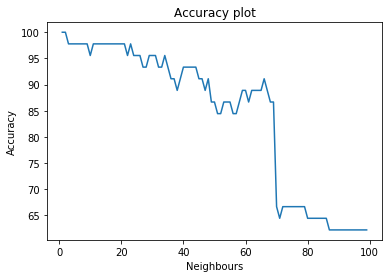

In [40]:
import matplotlib.pyplot as plt
 
x = df.Neighbour
y = df.Accuracy 
plt.plot(x, y) 
plt.xlabel('Neighbours') 
plt.ylabel('Accuracy') 
plt.title('Accuracy plot')  
plt.show() 

-->Lower value of k leads to overfitting --> algorithm behaves as over fitting and it gives a non - smooth decision surface

-->Higher value of k leads to underfitting --> which smoothens the curve resulting in under fitting

-->From the graph you could see as the neighbours increase the accuracy decreases